In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import panel as pn

In [3]:
LTPD = np.linspace(0,1,1001) #the range of potential defect rates in the lot
Pa = lambda c,n: stats.binom.cdf(c,n,LTPD)

Column
    [0] IntSlider(end=10, name='c:')
    [1] IntSlider(end=100, name='n:')
    [2] DiscreteSlider(name='AQL:', options=[0.0001, 0.00015, ...], value=0.04)
    [3] FloatSlider(end=0.5, name='RQL:')
    [4] ParamFunction(function, _pane=Matplotlib, defer_load=False)
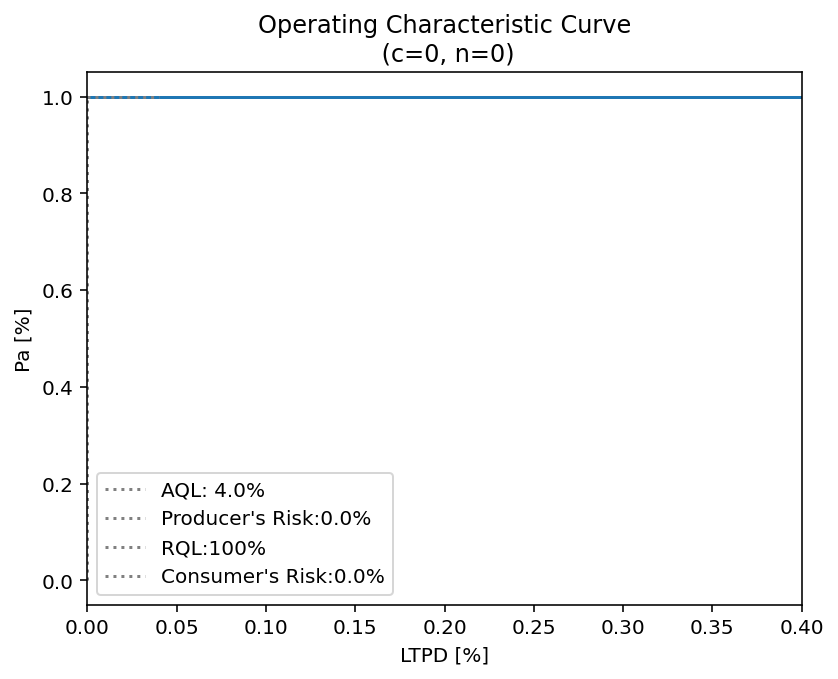

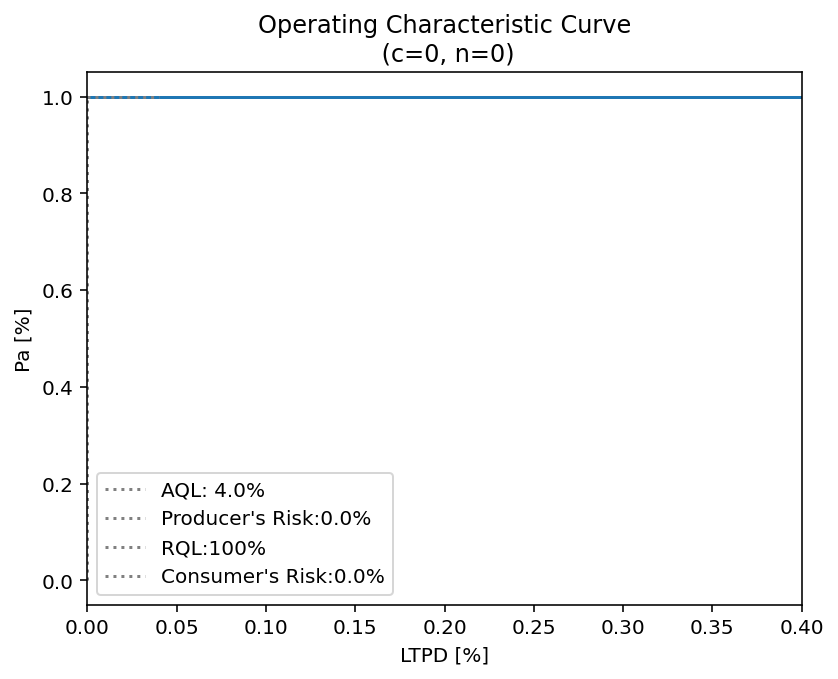

In [18]:
def plot(c,n,AQL,RQL):
    Pa1 = Pa(c,n)
    plt.plot(LTPD, Pa1)
    plt.xlabel('LTPD [%]')
    plt.ylabel('Pa [%]')
    plt.xlim(0,.4)
    producers_risk = Pa1[max(np.where(LTPD<=AQL)[0])]
    consumers_risk = LTPD[min(np.where(Pa1<=1-RQL)[0])]
    plt.title(f'Operating Characteristic Curve\n (c={c}, n={n})')
    plt.vlines(x=AQL, ymin=min(Pa1), ymax=min(Pa1[np.where(LTPD<=AQL)[0]]), color='gray', linestyle=':', label=f'AQL: {np.round(AQL*100,2)}%')
    plt.hlines(y=producers_risk, xmin=0, xmax=AQL, color='gray', linestyle=':', label=f'Producer\'s Risk:{np.round(100*(1-producers_risk),1)}%') 
    plt.hlines(y=1-RQL, xmin=min(LTPD), xmax=consumers_risk, color='gray', linestyle=':', label=f'RQL:{np.round(100*(1-RQL),2)}%')
    plt.vlines(x=consumers_risk, ymin=0, ymax=1-RQL, color='gray', linestyle=':', label=f'Consumer\'s Risk:{np.round(100*consumers_risk,1)}%')
    plt.legend()
    return pn.pane.Matplotlib(plt.gcf(), tight=True)
pn.extension()
c_slider = pn.widgets.IntSlider(name='c:', start=0, end=10, step=1)
n_slider = pn.widgets.IntSlider(name='n:', start=0, end=100, step=1)
AQL_slider = pn.widgets.DiscreteSlider(name='AQL:',
                                       options=[.0001, .00015, .00025, .00065, .001, .0015, 
                                                .0025, .004, .0065,.01,.015,.025,.04,.065,.1],
                                       value=.04)
RQL_slider = pn.widgets.FloatSlider(name='RQL:', start=0, end=0.5, step=0.1)
interactive_plot = pn.bind(plot, c=c_slider, n=n_slider, AQL=AQL_slider, RQL=RQL_slider)
app = pn.Column(c_slider, n_slider, AQL_slider, RQL_slider, interactive_plot)
app.servable()


Column
    [0] IntSlider(end=10, name='c:')
    [1] IntSlider(end=100, name='n:', value=29)
    [2] DiscreteSlider(name='AQL:', options=[0.0001, 0.00015, ...], value=0.04)
    [3] FloatSlider(end=0.5, name='RQL:')
    [4] ParamFunction(function, _pane=Matplotlib, defer_load=False)

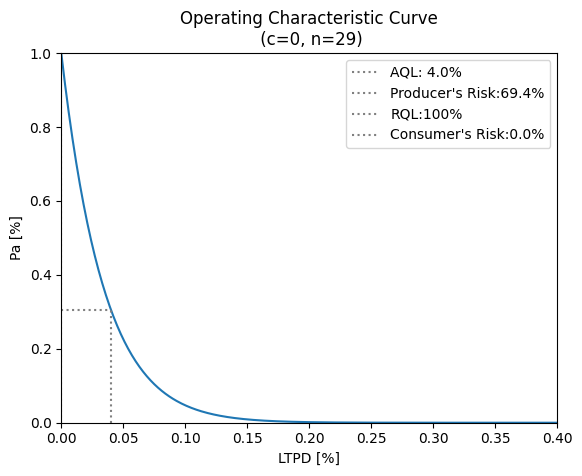

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import panel as pn

LTPD = np.linspace(0,1,1001) #the range of potential defect rates in the lot
Pa = lambda c,n: stats.binom.cdf(c,n,LTPD)

def plot(c,n,AQL,RQL,x_range, y_range):
    Pa1 = Pa(c,n)
    plt.clf()
    plt.plot(LTPD, Pa1)
    plt.xlabel('LTPD [%]')
    plt.ylabel('Pa [%]')
    # Set axis limits based on sliders
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    producers_risk = Pa1[max(np.where(LTPD<=AQL)[0])]
    consumers_risk = LTPD[min(np.where(Pa1<=1-RQL)[0])]
    plt.title(f'Operating Characteristic Curve\n (c={c}, n={n})')
    plt.vlines(x=AQL, ymin=min(Pa1), ymax=min(Pa1[np.where(LTPD<=AQL)[0]]), color='gray', linestyle=':', label=f'AQL: {np.round(AQL*100,2)}%')
    plt.hlines(y=producers_risk, xmin=0, xmax=AQL, color='gray', linestyle=':', label=f'Producer\'s Risk:{np.round(100*(1-producers_risk),1)}%') 
    plt.hlines(y=1-RQL, xmin=min(LTPD), xmax=consumers_risk, color='gray', linestyle=':', label=f'RQL:{np.round(100*(1-RQL),2)}%')
    plt.vlines(x=consumers_risk, ymin=0, ymax=1-RQL, color='gray', linestyle=':', label=f'Consumer\'s Risk:{np.round(100*consumers_risk,1)}%')


    plt.legend()
    return pn.pane.Matplotlib(plt.gcf(), tight=True)


x_range_slider = pn.widgets.RangeSlider(name='X-axis range', start=0, end=0.4, step=0.01, value=(0, 0.4))
y_range_slider = pn.widgets.RangeSlider(name='Y-axis range', start=0, end=1, step=0.05, value=(0, 1))
c_slider = pn.widgets.IntSlider(name='c:', start=0, end=10, step=1, value=0)
n_slider = pn.widgets.IntSlider(name='n:', start=0, end=100, step=1, value=29)
AQL_slider = pn.widgets.DiscreteSlider(name='AQL:',
                                       options=[.0001, .00015, .00025, .00065, .001, .0015, 
                                                .0025, .004, .0065,.01,.015,.025,.04,.065,.1],
                                       value=.04)
RQL_slider = pn.widgets.FloatSlider(name='RQL:', start=0, end=0.5, step=0.1)
interactive_plot = pn.bind(plot, c=c_slider, n=n_slider, AQL=AQL_slider, RQL=RQL_slider, x_range=x_range_slider, y_range=y_range_slider)
app = pn.Column(c_slider, n_slider, AQL_slider, RQL_slider, interactive_plot)
app.servable()
